In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [2]:
# настройки отображения графиков
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

### Orders - заказы у продавцов

In [3]:
orders = pd.read_csv(
    '/opt/kate_repo/real_data_analysis/emex_interview_task/orders.csv')

In [4]:
# Корректировка формата даты
orders['created_at'] = pd.to_datetime(orders['created_at'])

In [5]:
# Извлечение даты
orders['created_at'] = [d.date() for d in orders['created_at']]

In [6]:
# Сортировка данных по дате
orders = orders.sort_values('created_at', ascending=True)
orders.reset_index(drop=True, inplace=True)

In [7]:
orders.head()

,id,created_at,seller_id,product_price,quantity,status
0,1,2020-08-03,2,911.50,1,BuyerDidNotCome
1,2,2020-08-03,2,911.50,2,Rejection
2,3,2020-08-03,1,911.50,3,New
3,5,2020-08-03,1,5001.99,7,New
4,4,2020-08-03,2,911.50,1,Rejection


In [8]:
orders.shape

(338, 6)

In [9]:
# Типы данных
orders.dtypes

id                 int64
created_at        object
seller_id          int64
product_price    float64
quantity           int64
status            object
dtype: object

In [10]:
# Количество заказов по дням
orders_date_count = orders.groupby('created_at').count()
orders_date_count

,id,seller_id,product_price,quantity,status
created_at,,,,,
2020-08-03,5,5,5,5,5
2020-08-07,1,1,1,1,1
2020-08-11,4,4,4,4,4
2020-08-20,1,1,1,1,1
2020-08-21,3,3,3,3,3
...,...,...,...,...,...
2020-11-07,7,7,7,7,7
2020-11-08,4,4,4,4,4
2020-11-09,9,9,9,9,9


In [11]:
# Количество продавцов, разместивших заказы
num_seller = orders['seller_id'].value_counts(sort=False)
len(num_seller)

31

<AxesSubplot:>

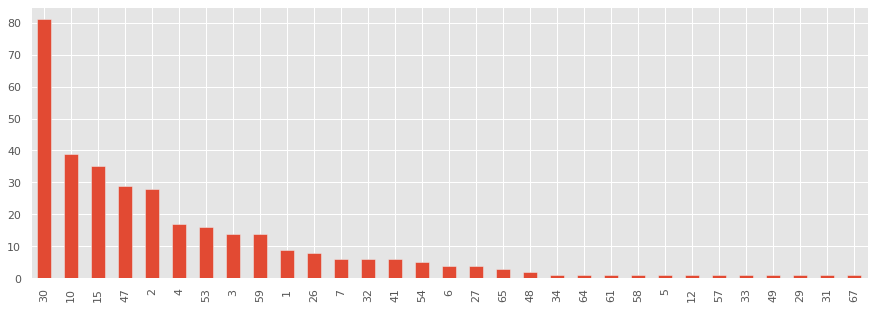

In [12]:
# Количество заказов у продавцов
orders['seller_id'].value_counts().plot.bar()

In [13]:
orders['status'].value_counts()

Issued             155
Rejection           66
New                 41
Canceled            38
BuyerDidNotCome     38
Name: status, dtype: int64

Text(0.5, 1.0, 'Статусы заказов у продавцов')

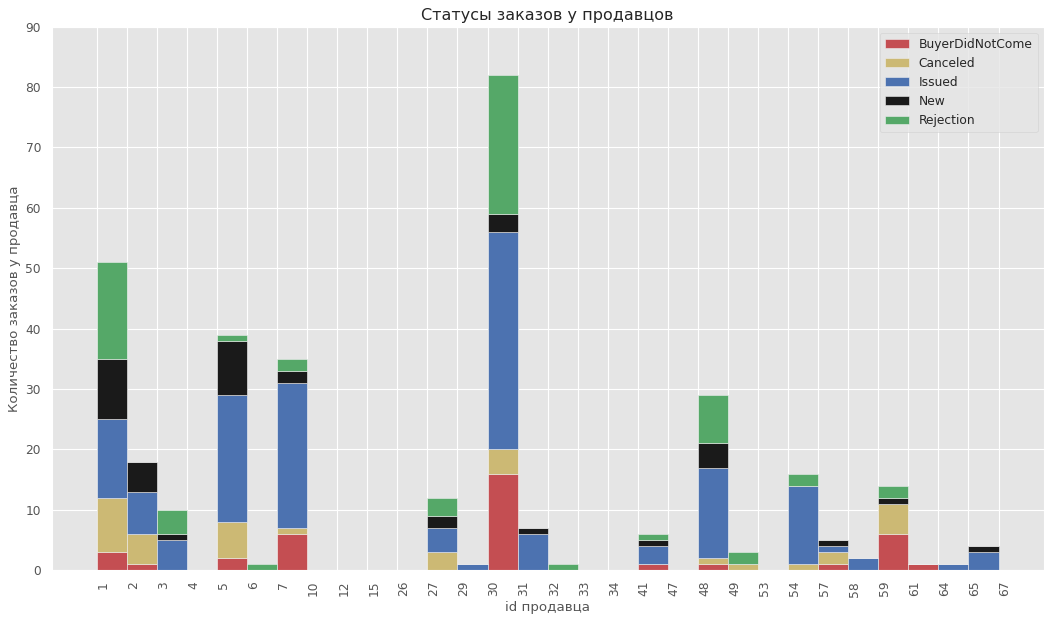

In [14]:
# Статусы заказов у продавцов

# Данные
x_var = 'seller_id'
groupby_var = 'status'
orders_agg = orders.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [orders[x_var].values.tolist() for i, orders in orders_agg]

# График
plt.figure(figsize=(16, 9), dpi=80)
n, bins, patches = plt.hist(vals,
                            30,
                            stacked=True,
                            density=False,
                            color=['r', 'y', 'b', 'k', 'g'])

# Легенда
colors = [plt.cm.Spectral(i / float(len(vals) - 1)) for i in range(len(vals))]
plt.legend({
    group: col
    for group, col in zip(
        np.unique(orders[groupby_var]).tolist(), colors[:len(vals)])
})

plt.ylim(0, 90)
plt.xticks(ticks=bins,
           labels=np.unique(orders[x_var]).tolist(),
           rotation=90,
           horizontalalignment='left')
plt.xlabel('id продавца')
plt.ylabel('Количество заказов у продавца')
plt.title('Статусы заказов у продавцов')

In [15]:
# Достигнут критерий успешности пробного запуска >= 10 продаж на продавца
orders_issued = orders[orders['status'] == 'Issued']

sellers_id_groups = orders_issued.groupby(['seller_id'])

success_sellers = sellers_id_groups.filter(
    lambda group: group['status'].count() >= 10)

Text(0.5, 1.0, '>= 10 продаж на продавца')

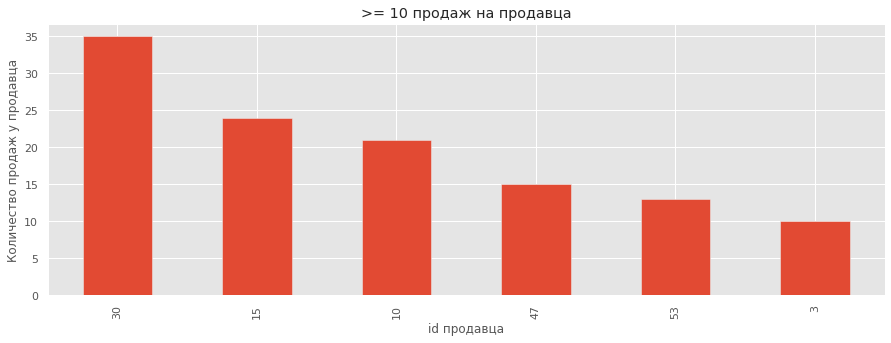

In [16]:
# Id продавцов, достигнувших критерия успешности
success_sellers['seller_id'].value_counts().plot.bar()

plt.xlabel('id продавца')
plt.ylabel('Количество продаж у продавца')
plt.title('>= 10 продаж на продавца')

In [17]:
# Процент продавцов, которым удалось достичь критерия успешности
num_success_sellers = success_sellers['seller_id'].value_counts(sort=False)

percent_success_sellers = len(num_success_sellers) / len(num_seller) * 100
percent_unsuccess_sellers = (
    len(num_seller) - num_success_sellers.count()) / len(num_seller) * 100

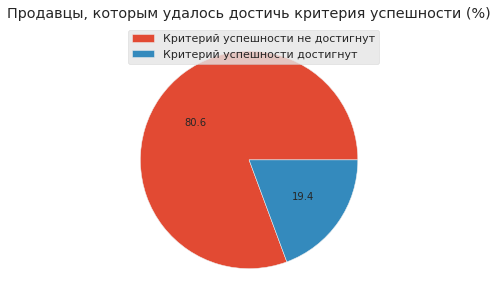

<Figure size 1080x360 with 0 Axes>

In [18]:
plt.pie([percent_unsuccess_sellers, percent_success_sellers], autopct='%.1f')

plt.title('Продавцы, которым удалось достичь критерия успешности (%)')
plt.legend(loc='best',
           labels=('Критерий успешности не достигнут',
                   'Критерий успешности достигнут'))
plt.show()

plt.savefig('Продавцы, которым удалось достичь критерия успешности (%).png');

### Registrations - заявки потенциальных продавцов

In [19]:
registrations = pd.read_csv(
    '/opt/kate_repo/real_data_analysis/emex_interview_task/registrations.csv')
registrations.head()

,id,inn,created_at,is_accepted,is_seller
0,5781db93a6444c921c45efcc7f30bd08,2.301126e+11,2020-07-17 10:11:40.204382,False,False
1,e8862ca7b667307568ca408c05c57cce,5.047905e+11,2020-07-31 15:54:30.906968,False,False
2,838ae3edd30e77940522cb950fb6a77d,NaN,2020-08-03 08:09:59.410891,False,True
3,d8aa22a597b538ddef927675a20fec45,NaN,2020-07-29 10:03:43.949494,False,True
4,d30bd4297f49a76595df3eb348b59eaa,NaN,2020-07-30 12:48:44.982906,False,True


In [20]:
registrations.dtypes

id              object
inn            float64
created_at      object
is_accepted       bool
is_seller         bool
dtype: object

In [21]:
# Переименование столбцов
registrations.rename(columns=lambda x: x.replace('inn', 'Inn'), inplace=True)
registrations.rename(
    columns=lambda x: x.replace('created_at', 'created_at_registrations'),
    inplace=True)

In [22]:
registrations.shape

(6537, 5)

In [23]:
# Список долей отсутствующих записей для каждого признака
for col in registrations.columns:
    pct_missing = np.mean(registrations[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing * 100)))

id - 0%
Inn - 73%
created_at_registrations - 0%
is_accepted - 0%
is_seller - 0%


In [24]:
# Заполнение отсутствующих данных значением 0
registrations = registrations.fillna(0)

In [ ]:
# Сортировка данных по дате
registrations = registrations.sort_values('created_at_registrations',
                                          ascending=True)
registrations.reset_index(drop=True, inplace=True)

In [25]:
# Корректировка форматов даты и ИНН
registrations['created_at_registrations'] = pd.to_datetime(
    registrations['created_at_registrations'])

registrations['created_at_registrations'] = [
    d.date() for d in registrations['created_at_registrations']
]

registrations['Inn'] = registrations['Inn'].astype(int)

In [26]:
# Продавцы, успешно прошедшие регистрацию
registrations_is_correct = registrations[(registrations['is_accepted'] == True)
                                         &
                                         (registrations['is_seller'] == True)]
registrations_is_correct = registrations_is_correct.sort_values(
    'created_at_registrations', ascending=True)
registrations_is_correct.reset_index(drop=True, inplace=True)
len(registrations_is_correct)

86

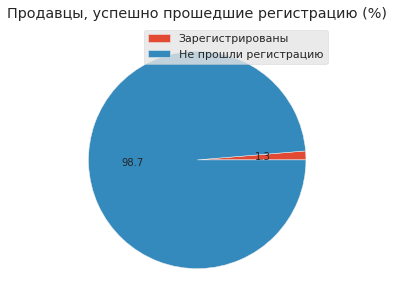

In [28]:
# Продавцы, успешно прошедшие регистрацию
correct = len(registrations_is_correct)
reject = len(registrations) - len(registrations_is_correct)

plt.pie([correct, reject], autopct='%.1f')
plt.legend(loc='best', labels=('Зарегистрированы', 'Не прошли регистрацию'))
plt.title('Продавцы, успешно прошедшие регистрацию (%)')
plt.show()

### Sellers - учётные записи зарегистрированных продавцов

In [29]:
sellers = pd.read_csv(
    '/opt/kate_repo/real_data_analysis/emex_interview_task/sellers.csv',
    converters={'contractor_json': json.loads},
    header=0,
    quotechar='"')
contractor = sellers.join(pd.io.json.json_normalize(
    sellers["contractor_json"])).drop(["contractor_json"], axis=1)
contractor.head()

<ipython-input-29-6a9fd22de0f4>:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  contractor = sellers.join(pd.io.json.json_normalize(


,id,created_at,Inn,Bulk,City,Flat,Ogrn,House,Оkpo,Status,Street,ZipCode,LegalName,RegionName,Settlement
0,1,2020-08-03 07:12:03.963452,5544554451,None,None,None,None,None,None,0,None,None,None,None,None
1,2,2020-08-03 07:38:31.136276,0000000000,None,None,None,None,None,None,0,None,None,None,None,None
2,3,2020-08-04 05:58:33.473403,700202974358,None,Томск,None,317703100080340,None,0114009213,1,None,None,None,Томская область,None
3,4,2020-08-06 05:05:37.043578,7017216138,None,Томск,None,1087017018395,дом 9,85256729,1,улица Киевская,634012,"Общество с ограниченной ответственностью ""Авто...",Томская область,None
4,5,2020-08-06 06:03:06.613762,352500119022,None,None,None,316290100082018,None,0104421401,1,None,None,None,Архангельская область,None


In [30]:
# Переименование столбцов данных о зарегистрированных продавцах
contractor.rename(columns=lambda x: x.replace('id', 'seller_id'), inplace=True)
contractor.rename(
    columns=lambda x: x.replace('created_at', 'created_at_sellers'),
    inplace=True)

In [31]:
contractor.shape

(72, 15)

In [32]:
contractor.dtypes

seller_id              int64
created_at_sellers    object
Inn                   object
Bulk                  object
City                  object
Flat                  object
Ogrn                  object
House                 object
Оkpo                  object
Status                 int64
Street                object
ZipCode               object
LegalName             object
RegionName            object
Settlement            object
dtype: object

In [33]:
# Корректировка формата даты
contractor['created_at_sellers'] = pd.to_datetime(
    contractor['created_at_sellers'])

contractor['created_at_sellers'] = [
    d.date() for d in contractor['created_at_sellers']
]

In [34]:
# Список долей отсутствующих записей для каждого признака
for col in contractor.columns:
    pct_missing = np.mean(contractor[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing * 100)))

seller_id - 0%
created_at_sellers - 0%
Inn - 0%
Bulk - 97%
City - 18%
Flat - 93%
Ogrn - 7%
House - 78%
Оkpo - 8%
Status - 0%
Street - 78%
ZipCode - 78%
LegalName - 78%
RegionName - 7%
Settlement - 97%


In [35]:
# Заполнение отсутствующих данных значением 0
contractor = contractor.fillna(0)

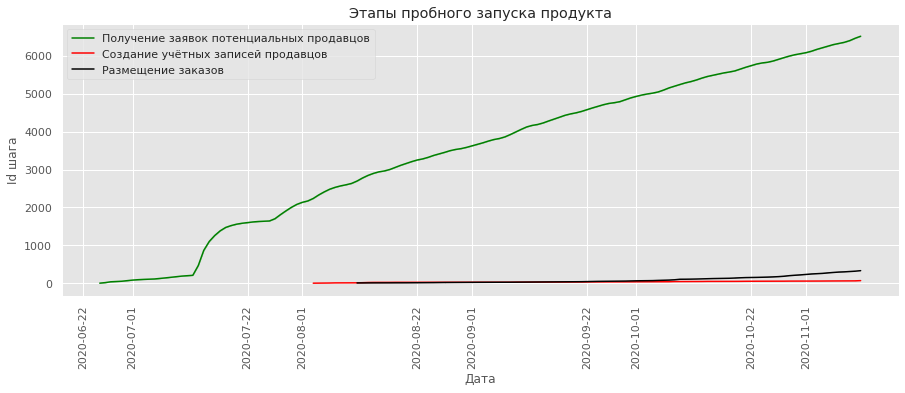

In [36]:
# Получение заявок потенциальных продавцов
x = registrations.created_at_registrations
y = registrations.index
sns.lineplot(x=x, y=y, data=registrations, color='green')

plt.xticks(rotation=90)

# Создание учётных записей продавцов
x = contractor.created_at_sellers
y = contractor.index
sns.lineplot(x=x, y=y, data=sellers, color='red')
plt.xticks(rotation=90)

# Размещение заказов
x = orders_issued.created_at
y = orders_issued.index
sns.lineplot(x=x, y=y, data=orders_issued, color='black')
plt.xticks(rotation=90)
plt.legend(loc='best',
           labels=('Получение заявок потенциальных продавцов',
                   'Создание учётных записей продавцов', 'Размещение заказов'))

plt.xlabel('Дата')
plt.ylabel('Id шага')
plt.title('Этапы пробного запуска продукта')

plt.savefig('Этапы пробного запуска продукта')

### Дата пробного запуска

In [37]:
registrations.created_at_registrations.min()

datetime.date(2020, 6, 25)

### Дата начала тестирования этапа создания учётных записей зарегистрированных продавцов:

In [38]:
contractor.created_at_sellers.min()

datetime.date(2020, 8, 3)

### Дата первого размещенного заказа

In [39]:
orders_issued.created_at.min()

datetime.date(2020, 8, 11)

### Дата первого выполненного заказа:

In [40]:
orders_issued.created_at.min()

datetime.date(2020, 8, 11)

In [41]:
# Id наиболее успешного продавца

dict_id_seller = orders.groupby(orders.seller_id)['created_at'].nunique()

dict_id_seller_max = [
    keys for keys, values in dict_id_seller.items()
    if values == dict_id_seller.max()
]
dict_id_seller_max

[30]

In [42]:
# Данные о наиболее успешном продавце
max_seller = orders[orders['seller_id'].isin(dict_id_seller_max)]
orders_with_saler_name = pd.merge(max_seller,
                                  contractor,
                                  on=['seller_id'],
                                  how='left')
orders_with_saler_name['Inn'] = orders_with_saler_name['Inn'].astype(int)
info_max_seller = pd.merge(orders_with_saler_name,
                           registrations,
                           on=['Inn'],
                           how='left')
info_max_seller.rename(
    columns=lambda x: x.replace('created_at', 'created_at_orders'),
    inplace=True)

info_max_seller.drop(info_max_seller.columns[[
    0, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23
]],
                     axis='columns')
# info_max_seller

,created_at_orders,seller_id,status,created_at_orders_sellers,created_at_orders_registrations
0,2020-09-14,30,BuyerDidNotCome,2020-09-12,2020-08-17
1,2020-09-14,30,Rejection,2020-09-12,2020-08-17
2,2020-09-14,30,Rejection,2020-09-12,2020-08-17
3,2020-09-14,30,Rejection,2020-09-12,2020-08-17
4,2020-09-16,30,Rejection,2020-09-12,2020-08-17
...,...,...,...,...,...
76,2020-11-09,30,BuyerDidNotCome,2020-09-12,2020-08-17
77,2020-11-09,30,BuyerDidNotCome,2020-09-12,2020-08-17
78,2020-11-10,30,Rejection,2020-09-12,2020-08-17
79,2020-11-11,30,BuyerDidNotCome,2020-09-12,2020-08-17


In [43]:
info_max_seller.created_at_orders.min()

datetime.date(2020, 9, 14)

In [44]:
# Самая ранняя дата заказа со статусом New
info_max_seller_new_order = info_max_seller[info_max_seller['status'] == 'New']
info_max_seller_new_order.created_at_orders.min()

datetime.date(2020, 11, 2)

In [45]:
# Самая ранняя дата заказа со статусом Issued
info_max_seller_new_order = info_max_seller[info_max_seller['status'] ==
                                            'Issued']
info_max_seller_new_order.created_at_orders.min()

datetime.date(2020, 9, 24)

### Какие характерные этапы были в запуске, сколько их было и когда?

### Удалось ли достичь критериев успешности?